Ник на skepik и kaggle: Tikhvinskiy
- Результат на регрессии: 0.84579
- Результат на catboost с новыми фичами: 0.85551 (второе место)

<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [148]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

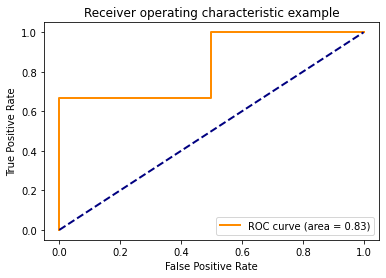

In [149]:
# можно и построить график ROC-AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_true, y_predictions)
roc_auc= auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Первая часть. Исследование

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [151]:
data = pd.read_csv('./train.csv')

In [152]:
# Смотрим на данные

data.head(8)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1


In [153]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [154]:
# Как видим пропусков нет
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [155]:
# Удостоверимся, посчитаем сумму пропусков по каждому признаку

data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [156]:
# Хотя пропусков в данных нет, есть пустые строки " ", напишем функцию заменяющие пропуски на медиану

def to_num(df, cols=None):
  if not cols:
    cols = df.columns
  for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].median())
    print(f'Признак {col}, тип {df[col].dtype}, пропусков {df[col].isna().sum()}')


to_num(data, num_cols)

Признак ClientPeriod, тип int64, пропусков 0
Признак MonthlySpending, тип float64, пропусков 0
Признак TotalSpent, тип float64, пропусков 0


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

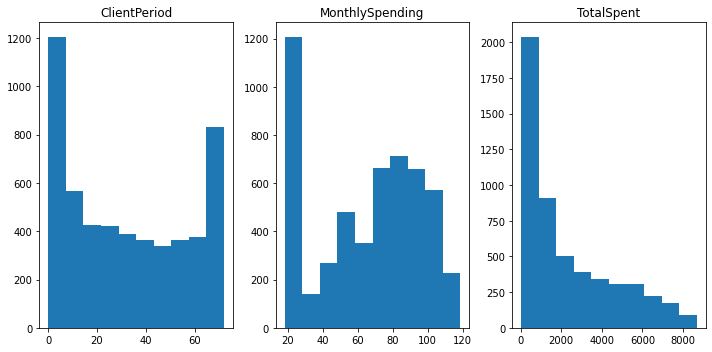

In [157]:
# Строим гистограммы по количественным признакам

fig, a = plt.subplots(ncols=3, nrows=1, figsize=(10, 5))
for col,ax in zip(data[num_cols], a.ravel()):
    ax.hist(data[col])
    ax.set_title(col)
plt.tight_layout()

In [158]:
# Для категориальных считаем количество каждого значения для каждого признака.
for i in cat_cols:
  print('*'*50)
  print('Категориальных признак', i)
  print(data[i].value_counts())

**************************************************
Категориальных признак Sex
Male      2655
Female    2627
Name: Sex, dtype: int64
**************************************************
Категориальных признак IsSeniorCitizen
0    4440
1     842
Name: IsSeniorCitizen, dtype: int64
**************************************************
Категориальных признак HasPartner
No     2705
Yes    2577
Name: HasPartner, dtype: int64
**************************************************
Категориальных признак HasChild
No     3676
Yes    1606
Name: HasChild, dtype: int64
**************************************************
Категориальных признак HasPhoneService
Yes    4761
No      521
Name: HasPhoneService, dtype: int64
**************************************************
Категориальных признак HasMultiplePhoneNumbers
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64
**************************************************
Категориальных признак HasIn

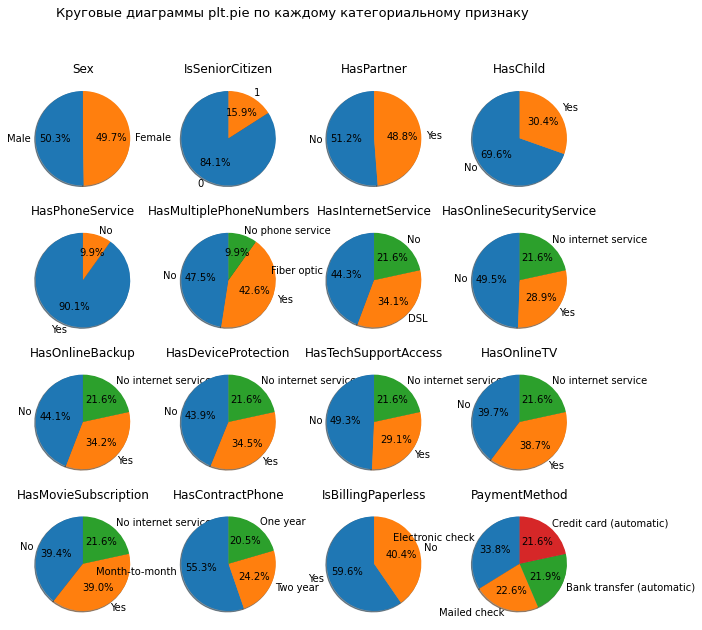

In [159]:
# Круговые диаграммы plt.pie()
 
fig, a = plt.subplots(ncols=4, nrows=4, figsize=(10, 10))
fig.suptitle("Круговые диаграммы plt.pie по каждому категориальному признаку", fontsize=13)
for col,ax in zip(data[cat_cols], a.ravel()):
    p = data[col].value_counts()
    ax.pie(p, labels=p.index, autopct='%1.1f%%', shadow=True, startangle=90)
    ax.set_title(col)

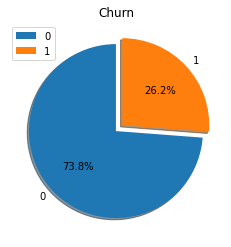

In [160]:
# Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.
d = data[target_col].value_counts()
plt.pie(d, labels=d.index, explode = (0, 0.1), autopct='%1.1f%%', shadow=True, startangle=90)
plt.title(target_col)
plt.legend()
plt.show()

# Видим, что небольшая разбалансировка есть

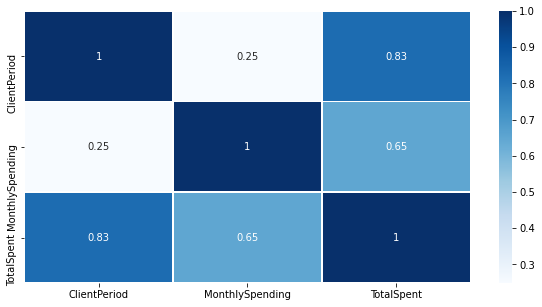

In [161]:
# Поиграйте с разными библиотеками для визуализации - sns, pandas_visual_analysis, etc.
# Построим корреляционную тепловую карту с помощью библиотеки sns

plt.figure(figsize = (10,5))
sns.heatmap(data[num_cols].corr(), annot=True, linewidths=0.5, cmap=plt.cm.Blues);

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [162]:
# Были заменены ' ' в числовых признаках на медиану

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [163]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [164]:
# Отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

test = pd.read_csv('test.csv')

# Преобразуем числовые признаки, уберем пропуски
to_num(test, num_cols)

Признак ClientPeriod, тип int64, пропусков 0
Признак MonthlySpending, тип float64, пропусков 0
Признак TotalSpent, тип float64, пропусков 0


In [165]:
# Нормируем численные признаки для train и test
scaler = StandardScaler()
X_train_scaled_numeric = pd.DataFrame(scaler.fit_transform(data[num_cols]), columns = num_cols)
X_test_scaled_numeric = pd.DataFrame(scaler.transform(test[num_cols]), columns = num_cols)

# Кодируем категориальные признаки

X_train_dummies = pd.get_dummies(data[cat_cols])
X_test_dummies = pd.get_dummies(test[cat_cols])

# Соединяем их в общий датасет

train = pd.concat([X_train_scaled_numeric, X_train_dummies], axis=1)
test = pd.concat([X_test_scaled_numeric, X_test_dummies], axis=1)

In [166]:
train.head(3)

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.920767,-1.505447,-0.557323,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
1,1.613288,-1.294998,-0.184235,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
2,-1.279005,0.363737,-0.976549,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [167]:
X = train
y = data[target_col]

In [168]:
# Протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC

CV_model = GridSearchCV(estimator=LogisticRegression(), 
                            param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001]},
                            cv=5, 
                            scoring='roc_auc',
                            n_jobs=-1, 
                            verbose=10)
CV_model.fit(X, y)
print('Лучший результат', CV_model.best_score_,'при С=',CV_model.best_params_['C'])

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1863s.) Setting batch_size=2.


Лучший результат 0.8450601368359638 при С= 10


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.6s finished


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [169]:
# Лучший результат на train 0.8450601368359638 при С= 10
# Результат логистической регрессии на test`e Kaggle 0.84579

In [170]:
best_model = CV_model.best_estimator_
score = best_model.predict_proba(test)
sub = pd.DataFrame({'Id': range(len(score)), 'Churn': score[:,1]})
sub.to_csv('Submission_reg.csv', index=False)
sub.head(5)

,Id,Churn
0,0,0.037877
1,1,0.732362
2,2,0.685932
3,3,0.005558
4,4,0.001256


Score train ROC AUC = 0.8489471961314088


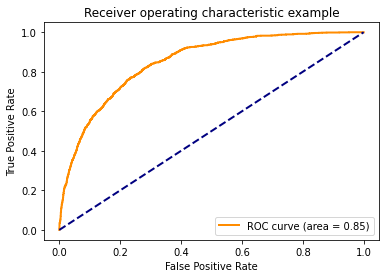

In [171]:
print('Score train ROC AUC =', roc_auc_score(y, best_model.predict_proba(X)[:,1]))

fpr, tpr, thresholds = roc_curve(y, best_model.predict_proba(X)[:,1])
roc_auc= auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [172]:
# Применим градиентный бустинг

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Преобразуем числовые признаки, уберем пропуски
to_num(train, num_cols)
to_num(test, num_cols)

Признак ClientPeriod, тип int64, пропусков 0
Признак MonthlySpending, тип float64, пропусков 0
Признак TotalSpent, тип float64, пропусков 0
Признак ClientPeriod, тип int64, пропусков 0
Признак MonthlySpending, тип float64, пропусков 0
Признак TotalSpent, тип float64, пропусков 0


In [173]:
# Кодируем категориальные признаки и преобразуем их в числовые значения, для операций над ними 

X_train_dummies = pd.get_dummies(train[cat_cols])
X_test_dummies = pd.get_dummies(test[cat_cols])

to_num(X_train_dummies)
to_num(X_test_dummies)

# Соединяем их в общий датасет

train = pd.concat([train[num_cols], X_train_dummies, train[target_col]], axis=1)
test = pd.concat([test[num_cols], X_test_dummies], axis=1)

Признак IsSeniorCitizen, тип int64, пропусков 0
Признак Sex_Female, тип uint8, пропусков 0
Признак Sex_Male, тип uint8, пропусков 0
Признак HasPartner_No, тип uint8, пропусков 0
Признак HasPartner_Yes, тип uint8, пропусков 0
Признак HasChild_No, тип uint8, пропусков 0
Признак HasChild_Yes, тип uint8, пропусков 0
Признак HasPhoneService_No, тип uint8, пропусков 0
Признак HasPhoneService_Yes, тип uint8, пропусков 0
Признак HasMultiplePhoneNumbers_No, тип uint8, пропусков 0
Признак HasMultiplePhoneNumbers_No phone service, тип uint8, пропусков 0
Признак HasMultiplePhoneNumbers_Yes, тип uint8, пропусков 0
Признак HasInternetService_DSL, тип uint8, пропусков 0
Признак HasInternetService_Fiber optic, тип uint8, пропусков 0
Признак HasInternetService_No, тип uint8, пропусков 0
Признак HasOnlineSecurityService_No, тип uint8, пропусков 0
Признак HasOnlineSecurityService_No internet service, тип uint8, пропусков 0
Признак HasOnlineSecurityService_Yes, тип uint8, пропусков 0
Признак HasOnlineBack

In [174]:
target_col = 'Churn'
category = ['IsSeniorCitizen',
       'Sex_Female', 'Sex_Male', 'HasPartner_No', 'HasPartner_Yes',
       'HasChild_No', 'HasChild_Yes', 'HasPhoneService_No',
       'HasPhoneService_Yes', 'HasMultiplePhoneNumbers_No',
       'HasMultiplePhoneNumbers_No phone service',
       'HasMultiplePhoneNumbers_Yes', 'HasInternetService_DSL',
       'HasInternetService_Fiber optic', 'HasInternetService_No',
       'HasOnlineSecurityService_No',
       'HasOnlineSecurityService_No internet service',
       'HasOnlineSecurityService_Yes', 'HasOnlineBackup_No',
       'HasOnlineBackup_No internet service', 'HasOnlineBackup_Yes',
       'HasDeviceProtection_No', 'HasDeviceProtection_No internet service',
       'HasDeviceProtection_Yes', 'HasTechSupportAccess_No',
       'HasTechSupportAccess_No internet service', 'HasTechSupportAccess_Yes',
       'HasOnlineTV_No', 'HasOnlineTV_No internet service', 'HasOnlineTV_Yes',
       'HasMovieSubscription_No', 'HasMovieSubscription_No internet service',
       'HasMovieSubscription_Yes', 'HasContractPhone_Month-to-month',
       'HasContractPhone_One year', 'HasContractPhone_Two year',
       'IsBillingPaperless_No', 'IsBillingPaperless_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

In [175]:
# Генерим дополнительные фичи

for df in [train, test]:
    df['f1'] = df['ClientPeriod'] / df['ClientPeriod'].median()
    df['f2'] = df['MonthlySpending'] / df['MonthlySpending'].median()
    df['f3'] = df['TotalSpent'] / df['TotalSpent'].median()
    df['f4'] = df['TotalSpent'] / df['MonthlySpending']
    df['f5'] = df[category].sum(axis=1)

In [176]:
features = train.columns.drop('Churn')

In [177]:
# Разделим выборку на train/valid

X_train, X_valid, y_train, y_valid = train_test_split(train[features], train[target_col], test_size=0.10)

In [178]:
X_train.head(3)

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,f1,f2,f3,f4,f5
921,72,67.80,4804.65,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,2.482759,0.963068,3.406949,70.865044,15
4764,23,24.35,538.50,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0.793103,0.345881,0.381847,22.114990,15
3708,2,19.35,46.35,0,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0.068966,0.274858,0.032867,2.395349,15


In [179]:
!pip install catboost
import catboost
from catboost import CatBoost

# Посмотрим качество catboost без оптимизации параметров

boosting_model = catboost.CatBoostClassifier()

boosting_model.fit(X_train, y_train)

y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(test)[:, 1]

Learning rate set to 0.020045
0:	learn: 0.6786623	total: 6.86ms	remaining: 6.86s
1:	learn: 0.6652409	total: 12.9ms	remaining: 6.45s
2:	learn: 0.6517462	total: 19.6ms	remaining: 6.52s
3:	learn: 0.6409073	total: 25.2ms	remaining: 6.27s
4:	learn: 0.6293413	total: 30.8ms	remaining: 6.12s
5:	learn: 0.6181455	total: 36.4ms	remaining: 6.03s
6:	learn: 0.6080005	total: 42.1ms	remaining: 5.97s
7:	learn: 0.5980563	total: 47.8ms	remaining: 5.93s
8:	learn: 0.5891594	total: 53.4ms	remaining: 5.88s
9:	learn: 0.5806979	total: 58.9ms	remaining: 5.83s
10:	learn: 0.5724451	total: 64.5ms	remaining: 5.8s
11:	learn: 0.5648035	total: 70.1ms	remaining: 5.77s
12:	learn: 0.5581089	total: 75.9ms	remaining: 5.76s
13:	learn: 0.5515731	total: 81.5ms	remaining: 5.74s
14:	learn: 0.5455248	total: 87.4ms	remaining: 5.74s
15:	learn: 0.5390492	total: 93ms	remaining: 5.72s
16:	learn: 0.5340918	total: 98.5ms	remaining: 5.7s
17:	learn: 0.5286069	total: 104ms	remaining: 5.68s
18:	learn: 0.5235353	total: 110ms	remaining: 5.66

Score train ROC AUC = 0.9431410942243681
Score validation ROC AUC = 0.8467295315072594


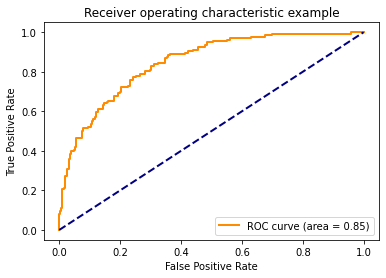

In [180]:
print('Score train ROC AUC =', roc_auc_score(y_train, y_train_predicted))
print('Score validation ROC AUC =', roc_auc_score(y_valid, boosting_model.predict_proba(X_valid)[:, 1]))

fpr, tpr, thresholds = roc_curve(y_valid, boosting_model.predict_proba(X_valid)[:, 1])
roc_auc= auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [181]:
# для лучшего результата подберем оптимальные параметры как указанно на странице документации 
# https://catboost.ai/docs/concepts/python-reference_catboost_grid_search.html

model = CatBoost()

grid = {'learning_rate': [0.01, 0.03, 0.1, 0.2, 0.3],
        'custom_metric': ['AUC:hints=skip_train~false'],
        'depth': [3, 4, 5, 6],
        'l2_leaf_reg': [ 1, 2, 5, 8],
        'n_estimators': [50, 100, 150]}

grid_search_result = model.grid_search(grid, 
                                       X=X_train, 
                                       y=y_train, 
                                       plot=False)
params = grid_search_result['params']
params


bestTest = 0.4551483395
bestIteration = 49

0:	loss: 0.4551483	best: 0.4551483 (0)	total: 115ms	remaining: 27.5s

bestTest = 0.3970477641
bestIteration = 49

1:	loss: 0.3970478	best: 0.3970478 (1)	total: 213ms	remaining: 25.4s

bestTest = 0.3758881848
bestIteration = 48

2:	loss: 0.3758882	best: 0.3758882 (2)	total: 303ms	remaining: 23.9s

bestTest = 0.3747324471
bestIteration = 39

3:	loss: 0.3747324	best: 0.3747324 (3)	total: 391ms	remaining: 23.1s

bestTest = 0.3749093398
bestIteration = 23

4:	loss: 0.3749093	best: 0.3747324 (3)	total: 475ms	remaining: 22.3s

bestTest = 0.455174897
bestIteration = 49

5:	loss: 0.4551749	best: 0.3747324 (3)	total: 558ms	remaining: 21.8s

bestTest = 0.3972413426
bestIteration = 49

6:	loss: 0.3972413	best: 0.3747324 (3)	total: 648ms	remaining: 21.6s

bestTest = 0.3758855396
bestIteration = 48

7:	loss: 0.3758855	best: 0.3747324 (3)	total: 752ms	remaining: 21.8s

bestTest = 0.3742570925
bestIteration = 39

8:	loss: 0.3742571	best: 0.3742571 (8)	total

{'custom_metric': 'AUC:hints=skip_train~false',
 'depth': 5,
 'iterations': 100,
 'l2_leaf_reg': 5,
 'learning_rate': 0.1}

# Предсказания

In [182]:
boosting_model = catboost.CatBoostClassifier(n_estimators=100, silent=True,
                                             cat_features=category,
                                             eval_metric='AUC',
                                             depth=4,
                                             l2_leaf_reg=1,
                                             learning_rate=0.1)

boosting_model.fit(X_train, y_train)

y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(test)[:, 1]

In [183]:
# Смотрим значимость признаков(фич)

fscore = pd.DataFrame(boosting_model.get_feature_importance(), index=X_train.columns, columns=['score']).sort_values(['score'], ascending=False)
fscore

,score
f1,10.889340
HasContractPhone_Month-to-month,10.521093
ClientPeriod,9.714075
HasContractPhone_Two year,8.401062
HasInternetService_Fiber optic,7.796980
f4,4.859042
HasOnlineSecurityService_No,4.517879
f2,3.950371
f3,3.748565
TotalSpent,3.507613


Score train ROC AUC = 0.8765618713193606
Score validation ROC AUC = 0.8487876066457118


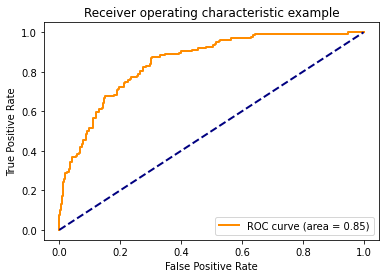

In [184]:
# Оптимизация параметров catboost увеличила результат на валидационной выборке 

print('Score train ROC AUC =', roc_auc_score(y_train, y_train_predicted))

print('Score validation ROC AUC =', roc_auc_score(y_valid, boosting_model.predict_proba(X_valid)[:, 1]))

fpr, tpr, thresholds = roc_curve(y_valid, boosting_model.predict_proba(X_valid)[:, 1])
roc_auc= auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [185]:
submission = pd.read_csv('submission_test.csv')
submission['Churn'] = y_test_predicted
submission.to_csv('Submission_cat2.csv', index=False)
submission.head(5)

,Id,Churn
0,0,0.056816
1,1,0.658358
2,2,0.636127
3,3,0.020690
4,4,0.002502


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.